We are going to compute the hazard and survival propabilities manually and compare them to ones obtained from 
the python package `lifelines`

In [1]:
from lifelines.datasets import load_waltons
df = load_waltons()
df1 = df.iloc[34:55][['T','E']]
df1 = df1.reset_index()
df1 = df1.drop("index",axis=1)
df1

,T,E
0,33.0,1
1,54.0,1
2,54.0,1
3,61.0,1
4,61.0,1
5,61.0,0
6,61.0,1
7,61.0,0
8,61.0,1
9,61.0,1


In [2]:
df1.dtypes

T    float64
E      int64
dtype: object

In [3]:
sl = []
hl = []
d = df1.iloc[0,1]
n = len(df1)
i = 0
prev_s = 0
prev_h = 0
while i < (len(df1)):
    t = df1.iloc[i,0]
    d = df1.iloc[i,1]
    j = i + 1
    while  j < (len(df1)) and df1.iloc[j,0] == t:
        d += df1.iloc[j,1]
        j += 1
    h = d/n
    s = 1 - h
    if i == 0:
        prev_s = s
        prev_h = h
    else:
        s *= prev_s
        prev_s = s
        h += prev_h
        prev_h = h
    hl.append(h)
    sl.append(s)
    n -= (j-i)
    if i == j:
        i+=1
    else:
        i = j

In [4]:
hl

[0.047619047619047616,
 0.14761904761904762,
 0.6476190476190476,
 1.5047619047619047]

In [5]:
sl

[0.9523809523809523,
 0.8571428571428571,
 0.42857142857142855,
 0.06122448979591839]

In [6]:
T = df1['T']
E = df1['E']
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
33.0,0.952381
54.0,0.857143
61.0,0.428571
69.0,0.061224


<AxesSubplot: xlabel='timeline'>

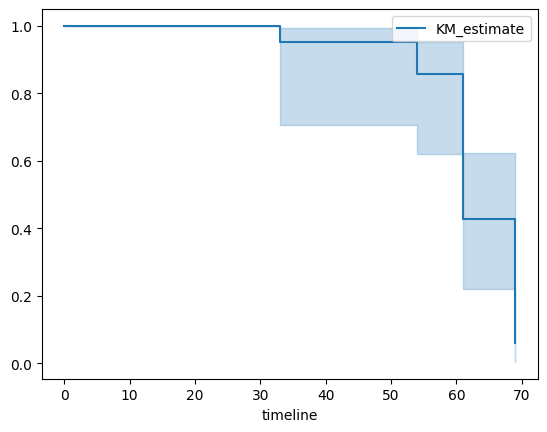

In [7]:
kmf.plot_survival_function()

In [8]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(T, event_observed=E)
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
33.0,0.047619
54.0,0.147619
61.0,0.647619
69.0,1.504762


<AxesSubplot: xlabel='timeline'>

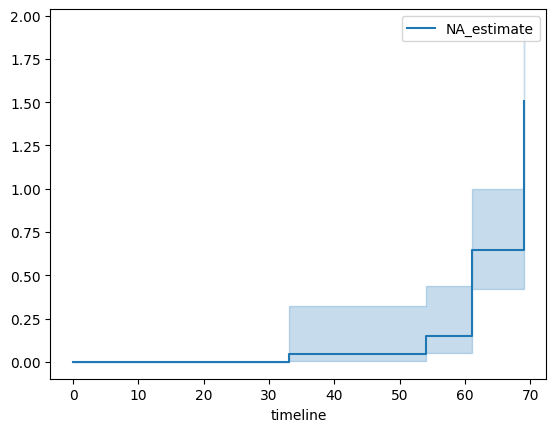

In [9]:
naf.plot_cumulative_hazard()

<AxesSubplot: >

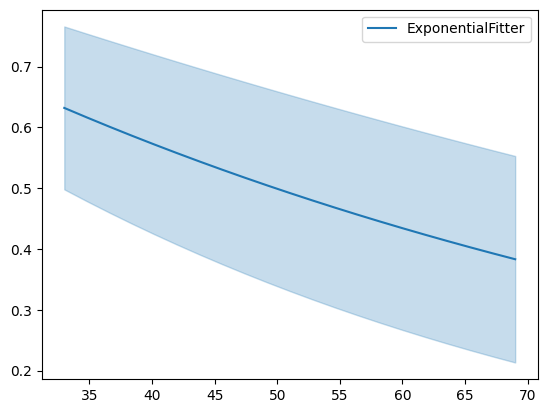

In [10]:
from lifelines import ExponentialFitter
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
exf.plot_survival_function()

<AxesSubplot: >

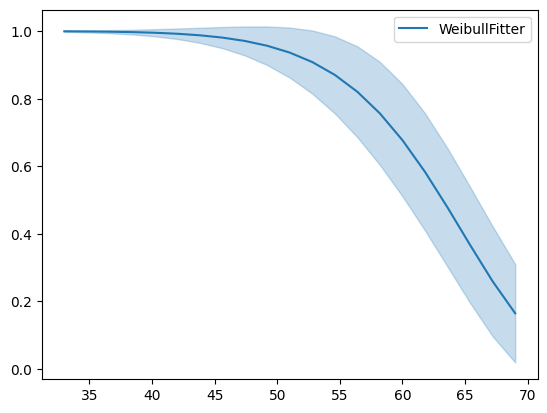

In [11]:
from lifelines import WeibullFitter
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
wbf.plot_survival_function()

In [12]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-12-22 19:11:10 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37